##결정트리

data_key : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature종류(=train의 feature순서)
 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


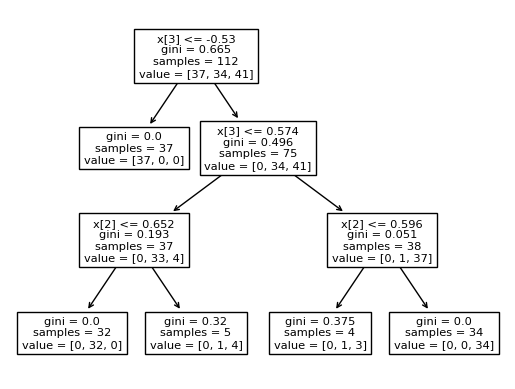

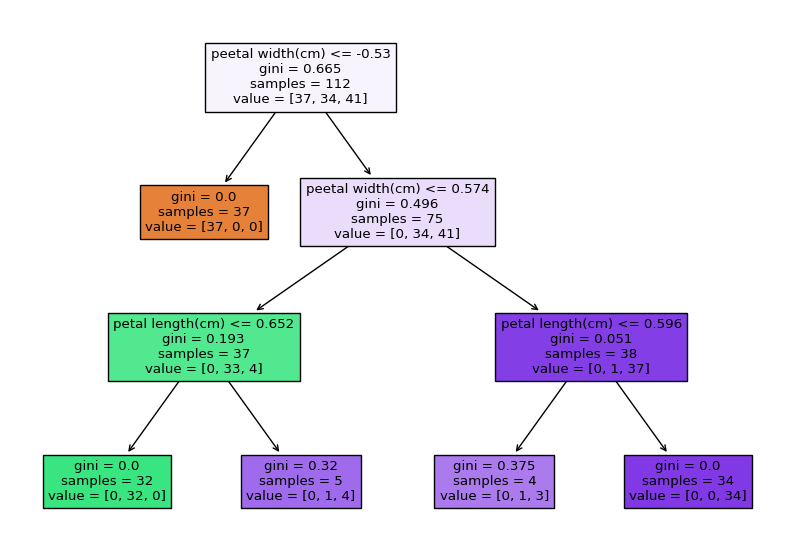


예측값
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
정답
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
train data에 대한 정확도 = 0.9821428571428571


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()
print("data_key : {}".format(iris_data.keys())) #load한 data들의 key 확인
print("feature종류(=train의 feature순서)\n = {}".format(iris_data['feature_names']))
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=1) #test_set과 train_set 생성
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
train_scaled = (train_input - data_mean)/data_std #표준점수 계산
test_scaled = (test_input - data_mean)/data_std

dt = DecisionTreeClassifier(max_depth=3,random_state=1)    #decisiontreeclassifier생성
dt.fit(train_scaled,train_target)
plot_tree(dt)
plt.show()

plt.figure(figsize=(10,7))#그래프사이즈 조정
plot_tree(dt, filled=True, feature_names=['sepal length(cm)','sepal width(cm)','petal length(cm)','peetal width(cm)']) #filled -> 클래스에 맞게 노드의 색깔지정
plt.show()
test_pred = dt.predict(test_scaled)
print("\n예측값")
print(test_pred)
print("정답")
print(test_target)
print("train data에 대한 정확도 = {}".format(dt.score(train_scaled,train_target)))


In [2]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

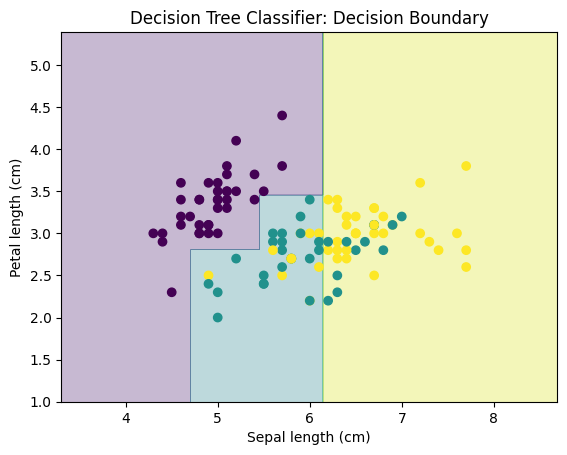

In [ ]:
x = iris_data['data'][:, [0, 1]]  # 2개의 특성만 사용
y = iris_data['target']
dt = DecisionTreeClassifier(max_depth=3, random_state=1) #2개의 특성만 사용해 학습
dt.fit(x, y)

def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title('Decision Tree Classifier: Decision Boundary')

plot_decision_boundary(dt, train_input, train_target)
plt.show()

##GBT

예측값
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
정답
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
테스트 정확도 :0.97
score : 0.9736842105263158
검증점수 : [about train, about test]  [1.0, 0.9640316205533598]

max depth = 1


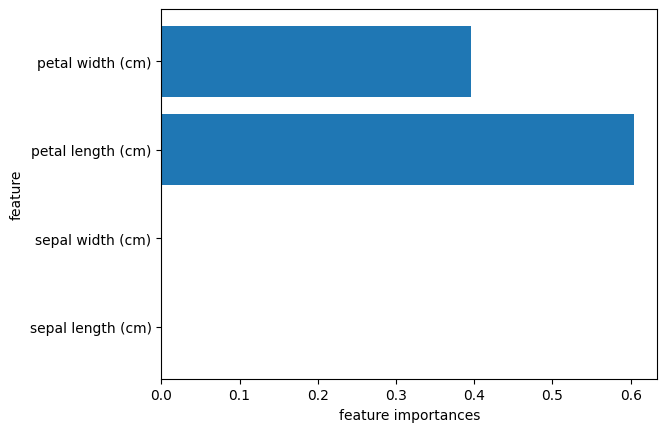


max depth = 2


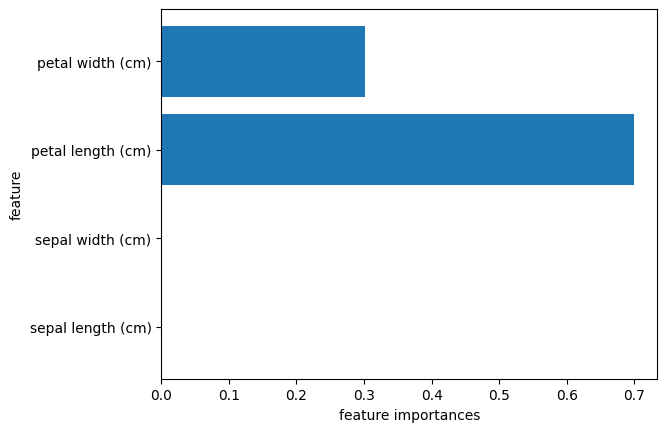


max depth = 3


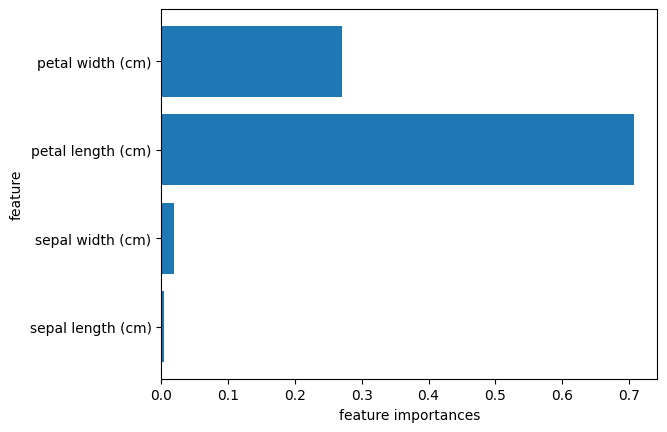


max depth = 4


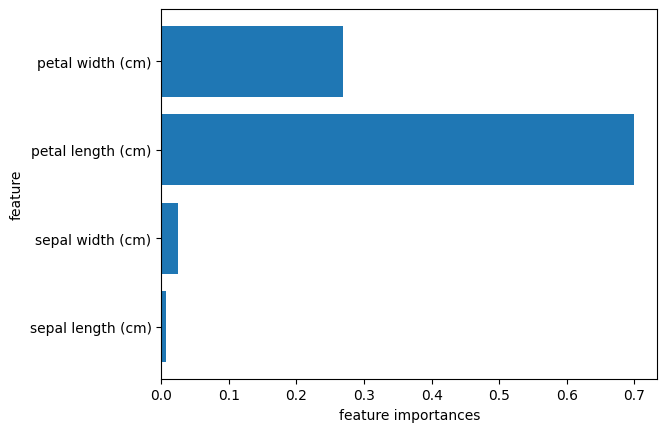


max depth = 5


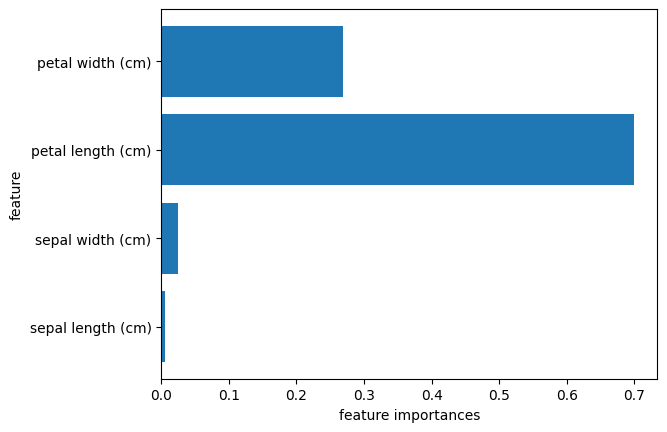

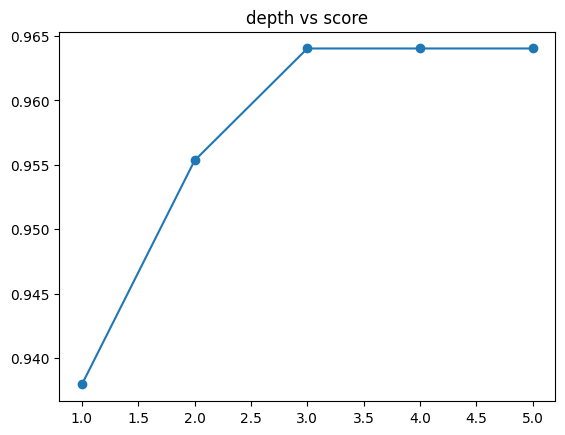

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

iris_data = load_iris()
train_input, test_input, train_target, test_target = train_test_split(iris_data['data'] ,iris_data['target'], random_state=0) #test_set과 train_set 생성
data_mean = np.mean(train_input, axis = 0)
data_std = np.std(train_input, axis =0)
train_scaled = (train_input - data_mean)/data_std #표준점수 계산

gb = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, max_depth=5,n_estimators=100)
gb.fit(train_scaled, train_target) #표준점수를 통해 train

# test준비
train_scaled = (train_input - data_mean)/data_std
train_pred = gb.predict(train_scaled)
test_scaled = (test_input - data_mean)/data_std
test_pred = gb.predict(test_scaled)

#test 결과
print("예측값")
print(test_pred)
print("정답")
print(test_target)
print("테스트 정확도 :{:.2f}".format(np.mean(test_pred== test_target)))
print("score : {}".format(gb.score(test_scaled,test_target))) #.score()->훈련이 잘되어있는지 check

#과대적합check
#cross_validate -> 교차 검증에 사용
#retrun_train_score = True 이면 test뿐만 아니라 train set에 대한 점수도 반환, n_jobs 병렬로 실행할 작업수 -1은 모든 process사용 의미
scores = cross_validate(gb, train_scaled, train_target, return_train_score = True, n_jobs=-1) # group => test와 train으로 분리할 group 의미 -> 기존의 train_scaled, train_target 에서 다시 test,train을 분류해서 검증점수check
print("검증점수 : [about train, about test] ",[np.mean(scores['train_score']),np.mean(scores['test_score'])])    # 각 feature에 대한 검증점수 평균내서 확인



n_feature = iris_data.data.shape[1]
feature=np.arange(n_feature)

depth = [1,2,3,4,5]
test_score_depth = []
test_score_gb = []
for i in depth:
 gb_depth = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, max_depth=i,n_estimators=100)
 gb_depth.fit(train_scaled, train_target)
 test_score_gb.append(accuracy_score(test_target, gb_depth.predict(test_scaled)))
 print("\nmax depth = {}".format(i))
 plt.barh(feature, gb_depth.feature_importances_, align='center') #수평 막대 형태로 plot
 plt.yticks(feature, iris_data.feature_names) #y축 레이블 표시
 plt.xlabel('feature importances')
 plt.ylabel('feature')
 plt.show()
 scores = cross_validate(gb_depth, train_scaled, train_target, return_train_score = True, n_jobs=-1) # group => test와 train으로 분리할 group 의미 -> 기존의 train_scaled, train_target 에서 다시 test,train을 분류해서 검증점수check
 test_score_depth.append(np.mean(scores['test_score']))

plt.title("depth vs score")
plt.plot(depth,test_score_depth,marker="o")
plt.show()



## 랜덤 포레스트

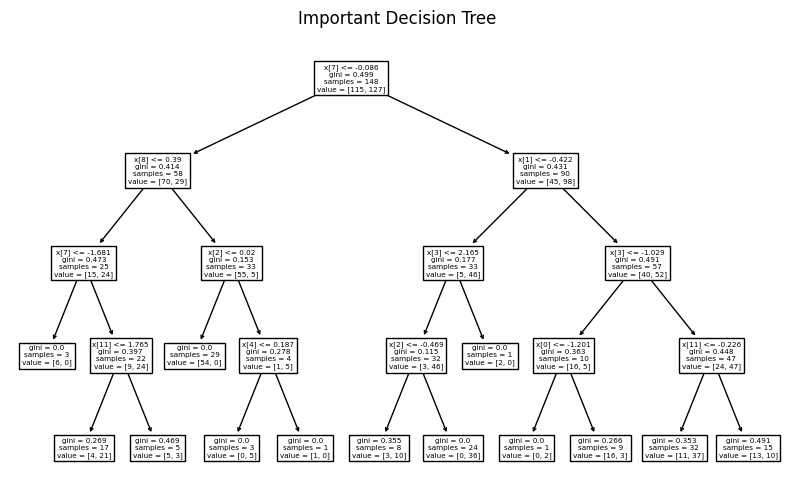

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (16).

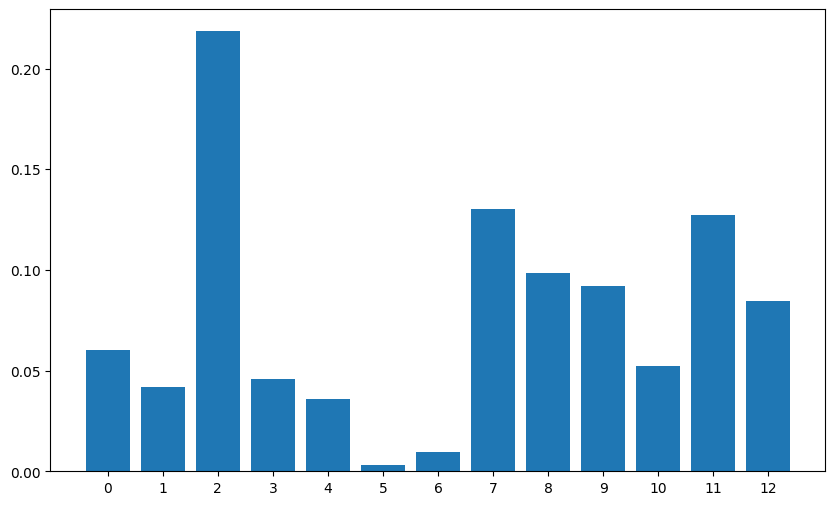

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate

from sklearn.tree import plot_tree #트리를 그리기 위한 라이브러리
from sklearn.ensemble import RandomForestClassifier  # 문제에서 랜덤포레스트를 통해 분류를 할것이므로 Classifier를 불러와야 한다.

from sklearn.model_selection import train_test_split
import numpy as np

#구글드라이프에 있는 파일을 불러오기위해 경로 지정
excel_file_path = '/content/drive/MyDrive/Q2.xls'

# 엑셀 파일 불러오기
data_2 = pd.read_excel(excel_file_path,header=0) #파일의 첫번째는 key들이므로 header=0으로 처리해서 이후 data처리할때 data의 value만 다룰 수 있도록 분리


#내가 읽은 data에서 마지막열은 output이므로 그전까지는 feature로 처리
feature_2 = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열을 feature로 선택
output_2 = data.iloc[:, -1]   # 마지막 열을 output으로 선택
train_input_2, test_input_2, train_target_2, test_target_2 = train_test_split(feature_2 ,output_2, random_state=1, test_size=0.2) #위에서 추출한 data를 섞어서 훈련 data와 test 데이터로 분류


#data 잔처리
data_mean = np.mean(train_input_2, axis = 0)
data_std = np.std(train_input_2, axis =0)
train_scaled_2 = (train_input_2 - data_mean)/data_std #표준점수 계산->standard하게 규격화
test_scaled_2 = (test_input_2 - data_mean)/data_std #표준화된 테스트 데이터 생성




rf  = RandomForestClassifier(n_estimators=100, random_state=1, max_depth = 4)  #sklearn라이브러리에서 제공하는 램덤포레스트 분류기를 rf라는 이름의 함수로 지정, 여기서 n_estimators 는 최대 학습 수(여기서는 트리의 개수를 의미)
#데이터 과적합을 막기 위해 이전처럼 최대 깊이를 4로 설정
#실제 다수결 방법이 아닌 다른 방법을 사용하고 싶었지만 randomForestClassifier는 기본적으로 다수결 방식을 사용하며 다른 방법으로 바꾸기 위한 매개변수가 설정되어있지 않았다
#-> 다른 방법을 사용하기 위해서는 실제 randomforestClassifer의 코드를 수정해야할 필요가 있으며 실제로 클래스로 구현하는게 아닌 이상  분류방식을 설정할수 있는 방법이 없었다.


rf.fit(train_scaled_2,train_target_2)
pred_2 = rf.predict(test_scaled_2)  #잔처리한 테스트 데이터를 통해 예측



# 특성 중요도를 기반으로 중요한 결정 트리 선택
important_tree_index = rf.feature_importances_.argmax()  #랜덤 포레스트에서 만든 트리중 특성중요도를 계산하고 argmax를 통해 그중 가장 컸던 트리의 index를 추출



# 중요한 결정 트리 시각화
plt.figure(figsize=(10, 6))
plot_tree(rf.estimators_[important_tree_index])   #위에서 구한 특성 중요도가 가장 큰 트리에 대해 그림을 그린다.
plt.title("Important Decision Tree")
plt.show()


# 특성 중요도 얻기
feature_importance = rf.feature_importances_   #sklearn의 결정트리 모델에서 제공하는 feature_importances_를 통해 특성 중요도를 알 수 있다. 위에서 정의한 dt를 통해 특성 중요도 계산

# 중요도를 시각화
plt.figure(figsize=(10, 6)) #그래프 사이즈 설정
plt.bar(range(len(feature_importance)), feature_importance)  #feature importance만큼의 막대가 필요하므로 range(len(feature_imporete)를 통해 특성중요도의 개수만큼의 영역을 만든다
plt.xticks(range(len(feature_importance)), data_2.columns[:-1], rotation=90)    #pandas로 data를 처리할때 특성이름 부분을 header로 처리해 잘랐으므로 원래 데이터에서 .colums를 통해 colum부분의 특성 이름 부분만 추출한다 맨 마지막은 output이므로 제외
plt.xlabel("특성")
plt.ylabel("중요도")
plt.title("특성 중요도")
plt.show()



##K-평균 알고리즘

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


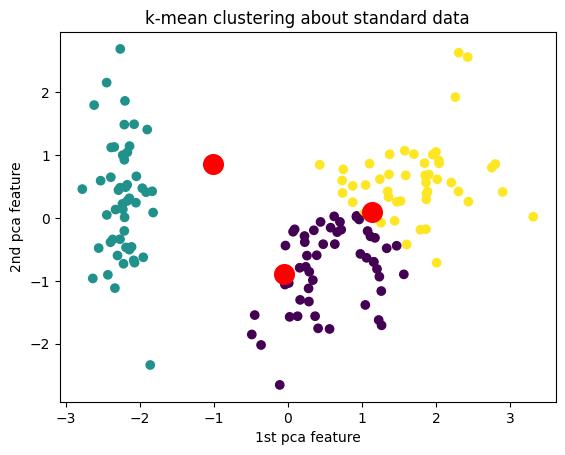

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_data = iris.data

#데이터 규격화_standard scale 사용
standard = StandardScaler()
data_scaled = standard.fit_transform(iris_data) #iris data를 standard scaled된 형태로 변환

#K-평균 클러스터링 사용
k_mean = KMeans(n_clusters = 3, random_state = 0)  #3개의 군집으로 구성
k_mean.fit(data_scaled)

#각 샘플에 클러스터 번호를 할당
labels = k_mean.labels_

#iris data의 feature는 4개 -> 2개의 feature로 pca를 이용해 축소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

#군집 그래프

plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap ='viridis')
#data_pca[:,0]->첫번째 주서분을 x축, data_pca[:,1]-> 2번째 주성분을 y축으로 사용, c=lables -> 각 데이터에 클러스터의 레이블 지정
centers = k_mean.cluster_centers_ #클러스터의 중심=데이터의 평균 계산
plt.scatter(centers[:,0], centers[:,1], s = 200, c='red')
plt.xlabel("1st pca feature")
plt.ylabel("2nd pca feature")
plt.title("k-mean clustering about standard data")
plt.show()






## 계층적 군집화 알고리즘


Hierarchical Clustering algorithm(계층적 군집화 알고리즘)
클러스터를 단계적으로 형성해 계층구조를 만든다.

1.계층적 병합 군집화
각 데이터 포인트를 개별 클러스터로 간주하고 시작한다.
그 후 가장 가까운 두 클러스터를 병합해 클러스터를 형성하면서 동작한다.
모든 데이터 포인트가 하나의 클러스터로 묶이거나 원하는 클러스터 개수에 도달할때 까지 작동한다.

2.계층적 분할 군집화
초기에 모든 데이터를 하나의 클러스터로 간주한다.
클러스터를 세분화하여 하위 클러스터를 형성하며
각 클러스터가 개별 데이터 포인트가 될때까지 계속한다.

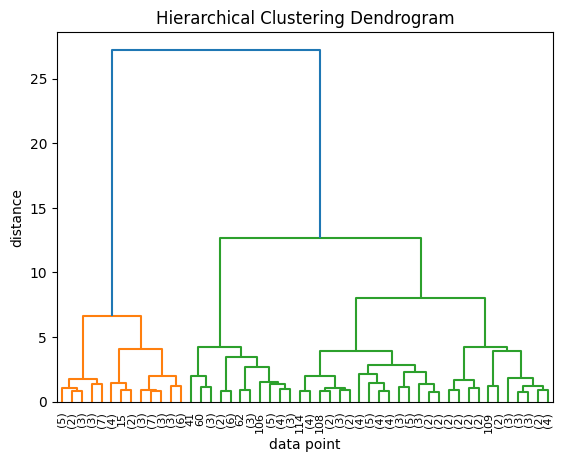

cluster label
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


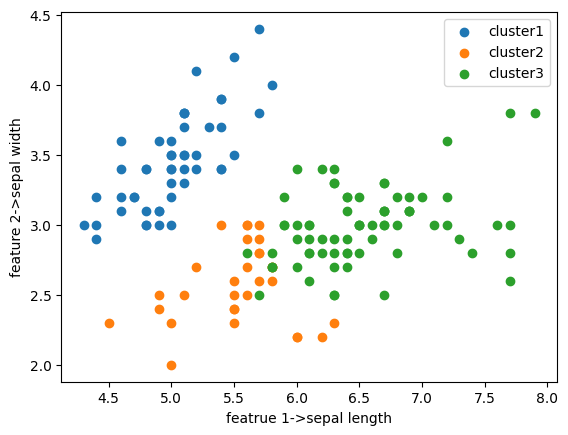

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn. datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster


iris = load_iris()
iris_data = iris.data

#데이터 규격화_standard scale 사용
standard = StandardScaler()
data_scaled = standard.fit_transform(iris_data) #iris data를 standard scaled된 형태로 변환


#clustring의 경우 데이터 간 거리를 기준으로 분할 -> 계층적 군집화를 시키기 위해 거리 행렬을 계산, 이때 유클리디안 기준으로 거리 계산
distance_matrix = pdist(data_scaled, metric = 'euclidean')

#계층적 군집화
#linkage -> 거리 행렬을 이용해 클러스터 간의 병합 정보를 계산 -> 계층적 군집화를 수행
linkage_matrix = linkage(distance_matrix, method = 'ward') #method = 'ward' -> 병합 군집화 사용(분산의 증가를 최소화 하는 방향으로)

#덴드로그램(계층 구조 시각화)
dendrogram (linkage_matrix, truncate_mode = 'lastp', p =50)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("data point")
plt.ylabel("distance")
plt.show()


n_cluster = 3 #군집의 개수
#fcluster -> 계층적 군집화 결과를 얻은 클러스터 정보를 기반으로 데이터 포인트를 클러스터로 할당
#t-> 클러스터링 결과의 임계값
#criterion -> 선택사항, 클러스터링 결과를 제어하는 기준 -> inconsistent:t를 클러스터내 거리의 불일치성 기반으로 선택, distance:t를 클러스터간의 거리를 기반으로 선택, maxclust:t를 원하느클러스 개수로 선택
label = fcluster(linkage_matrix, n_cluster, criterion = 'maxclust')

print("cluster label")
print(label)


#시각화
for cluster_num in range(1, n_cluster+1):
  cluster_point = iris_data[label == cluster_num]  #fcluster로 구분한 label = cluster_num(1 or 2 or 3)과 일치하는 데이터 선택
  plt.scatter(cluster_point[:,0],cluster_point[:,1], label = f'cluster{cluster_num}')
  #label =f'cluster{cluster_num} -> 클러스터 번호인 cluster_num을 포함하는 문자열 생성 ex) cluster num =1이면 cluster1 생성
plt.xlabel("featrue 1->sepal length")
plt.ylabel("feature 2->sepal width")
plt.legend()
plt.show()




##DBSCAN
DBSCAN algorithm(Density_Based Spatial Clustering of Applications with Noise)밀도 기반 군집화 알고리즘
데이터 포인트 간의 밀도가 높은 영역을 클러스토로 인식하고
데이터 포인트 간의 밀도가 낮은 영역을 노이즈로 처리해서 군집화를 한다.
1.밀도가 높은 지역을 클러스터, 낮은 지역을 노이즈로 처리
2.주변에 최소한 Min points만큼의 데이터 포인트를 가진 핵심포인트를 구분하고 주변 영역을 클러스터로 형성
3.클러스터의 경계를 구분, 경계는 하나의 클러스터에 속하지만 핵심 포인트 처럼 다른 포인트를 클러스터에 추가하지 않는다.
4.노이즈 포인트는 핵심포인트와 경계포인트가 아닌 데이터 포인트를 나타낸다
5.시작점을 선택하고 그 포인트를 기준으로 min points 내에 있는 다른 포인트들을 탐색해 클러스터를 형성하는 과정을 반복해 모든 데이터를 클러스터 or 노이즈에 해당
*클러스터의 밀도가 다를때 잘 작동

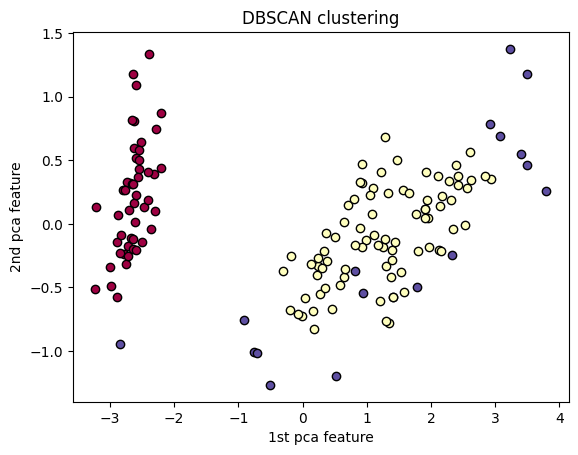

In [ ]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
iris = datasets.load_iris()
data = iris.data

dbscan = DBSCAN(eps = 0.5, min_samples =5) # eps=이웃을 고려할 거리, min_samples = 핵심포인트를 정의하는 최소 데이터 포인트수
dbscan.fit(data)

cluster_labels = dbscan.labels_ #dbscan을 통해 선정한 label 저장

pca = PCA(n_components=2) #2차원에서 그림을 그리므로 주성분을 2개만 선정
data_pca = pca.fit_transform(data)

unique_labels = set(cluster_labels) # cluster_labels는 각 data에 매칭된 label이 저장 ->cluster_labels의 고유 레이블을 추출
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
#plt.cm.Spectral -> matplotlib에서 제공하는 colormap
#np.linspace를 이용해 0에서 1 사이 클러스터 수에 따라 등간격으로 값을 생성하고 각 클러스터에 해당하는 색상 생성

for label, col in zip(unique_labels, colors):

  class_member_mask = (cluster_labels == label) #현재 클러스터 label에 속하는 데이터 포인트를 선택하기 위한 마스크
  pca_mask = data_pca[class_member_mask]        #mask는 데이터를 선택하는데 사용되는 배열 -> 조건을 만족하는 포인트를 선택
  plt.scatter(pca_mask[:,0],pca_mask[:,1],c=[col],edgecolor = 'k')

plt.title("DBSCAN clustering")
plt.xlabel("1st pca feature")
plt.ylabel("2nd pca feature")
plt.show()
